## Estandarización

### 1. Importamos las librerías necesarias.

In [40]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Estandarización
from sklearn.preprocessing import RobustScaler

# Configuración de los warning
import warnings
warnings.filterwarnings('ignore')

### 2. Abrimos el archivo con el que vamos a trabajar.

In [41]:
df = pd.read_csv("../archivos/bikes_eda.csv", index_col = 0)
df.head(2)

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,14.110847,80.5833,10.749882,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,14.902598,69.6087,16.652113,131,670,801,martes


### 3. Estandarización de las columnas.

In [42]:
# Seleccionamos las columnas que queremos estandarizar
numericas = df[['temperatura', 'humedad', 'velocidad_viento']]

In [43]:
numericas

,temperatura,humedad,velocidad_viento
0,14.110847,80.5833,10.749882
1,14.902598,69.6087,16.652113
2,8.050924,43.7273,16.636703
3,8.200000,59.0435,10.739832
4,9.305237,43.6957,12.522300
...,...,...,...
725,10.420847,65.2917,23.458911
726,10.386653,59.0000,10.416557
727,10.386653,75.2917,8.333661
728,10.489153,48.3333,23.500518


In [44]:
# Iniciamos el método
robust = RobustScaler()

In [45]:
# Ajustamos el modelo
robust.fit(numericas)

RobustScaler()

In [46]:
# Transformamos los datos
X_robust = robust.transform(numericas)

In [47]:
# Lo convertimos a dataframe
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,temperatura,humedad,velocidad_viento
0,-0.486274,0.855582,-0.208909
1,-0.425690,0.332722,0.687550


In [48]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna temperatura es:  -0.01121511337530535
La desviación estándar de la columna temperatura es: 0.5744038804193732
-------------------------------------------------------------
La media de la columna humedad es:  0.006678312043328619
La desviación estándar de la columna humedad es: 0.6783171666603836
-------------------------------------------------------------
La media de la columna velocidad_viento es:  0.09694722724811505
La desviación estándar de la columna velocidad_viento es: 0.7891689924205266
-------------------------------------------------------------


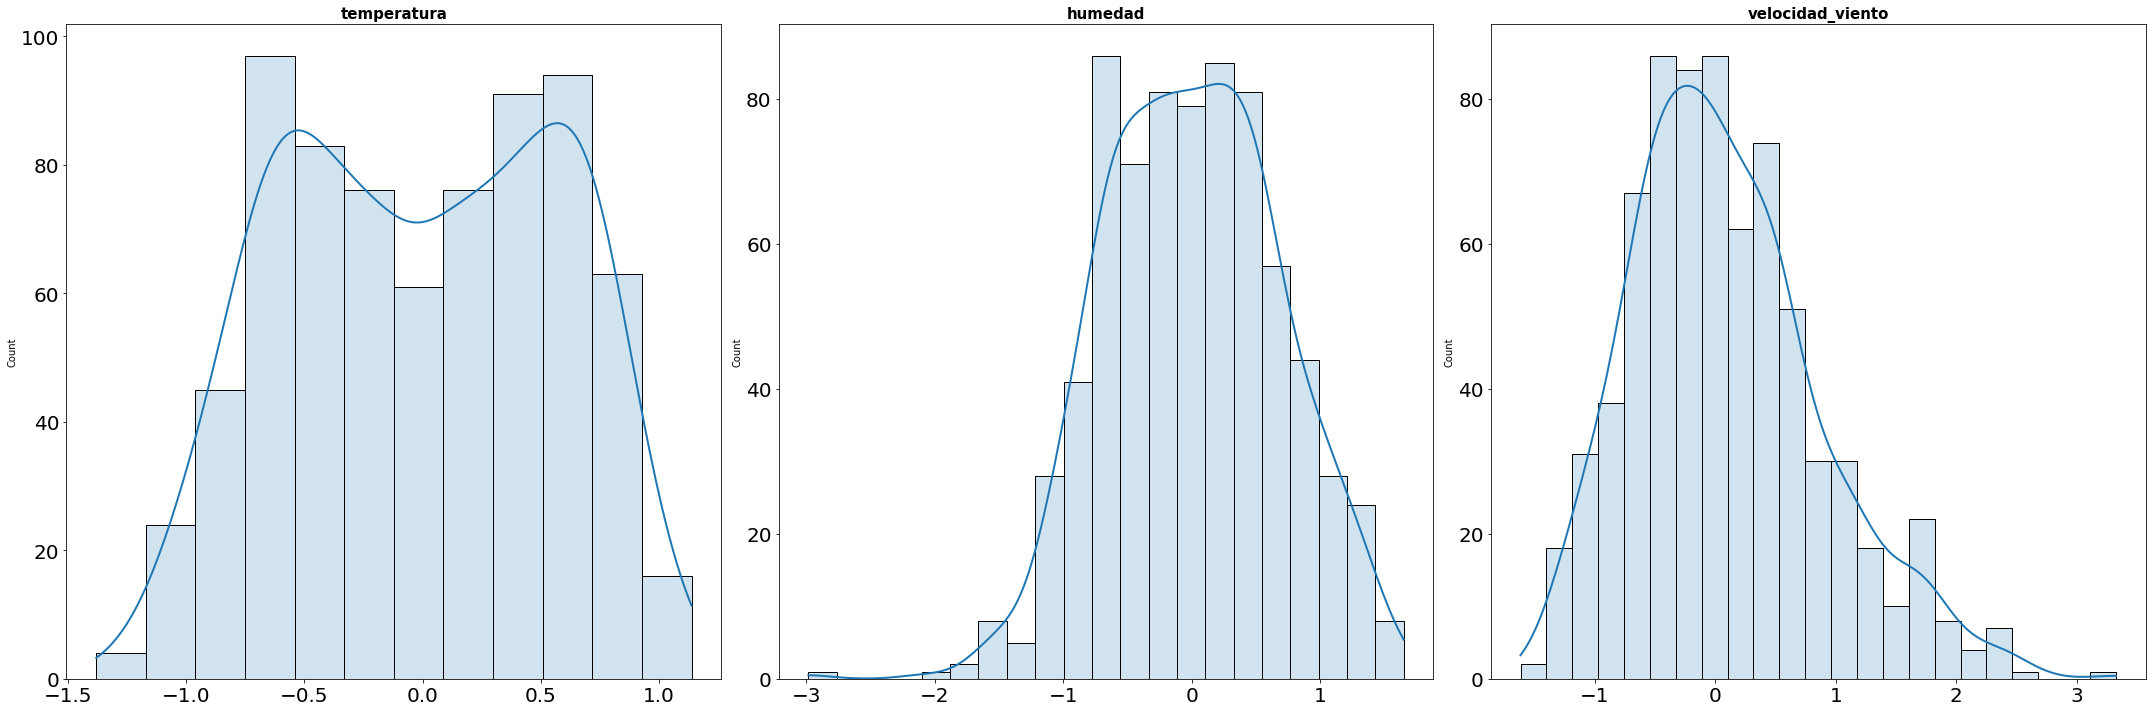

In [49]:
# Gráficas con la distritución de las variables estandarizadas

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [50]:
# Guardamos los cambios con las columnas numéricas estandarizadas en el dataframe total

df[numericas_robust.columns] = numericas_robust
df.head()

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,-0.486274,0.855582,-0.208909,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,-0.425690,0.332722,0.687550,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,-0.949970,-0.900337,0.685210,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,-0.938563,-0.170632,-0.210435,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,-0.853992,-0.901843,0.060294,82,1518,1600,viernes


In [55]:
# Organizamos las columnas
nuevo_orden = ['fecha','estacion','año','mes','dia_semana','dias_festivos','temperatura','humedad','velocidad_viento','clientes_casuales','clientes_registrados','total_bicis']
df = df.reindex(columns = nuevo_orden)
df.sample(3)

,fecha,estacion,año,mes,dia_semana,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis
76,2018-03-18,invierno,0,3,domingo,No Festivo,0.128105,-0.481348,0.509241,884,2355,3239
414,2019-02-19,invierno,1,2,martes,No Festivo,-0.687582,-0.526056,0.734086,618,2071,2689
322,2018-11-19,otoño,0,11,lunes,No Festivo,-0.533333,-0.591565,0.442882,943,2720,3663


In [54]:
# Guardamos el archivo estandarizado
df.to_csv("../archivos/bikes_stand.csv")